In [1]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import zipfile
with zipfile.ZipFile('//dogvscat.zip', 'r') as zip_ref:
    zip_ref.extractall()

folder = 'dogvscat/'

In [2]:
def displayImages(foldername,dogorcat,startID):
    # plot first few images
    for i in range(9):
        #define subplot 3x3
        pyplot.subplot(330 + 1 + i)
        # define filename
        filename = foldername + dogorcat +'.' + str(i+startID) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        pyplot.imshow(image)
        # show the figure
pyplot.show()

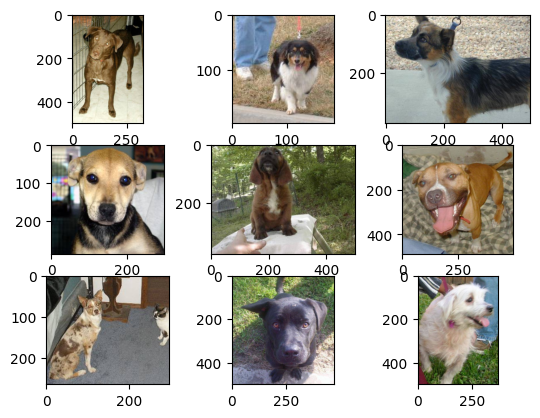

In [3]:
displayImages(folder+"train/dog/","dog",1)

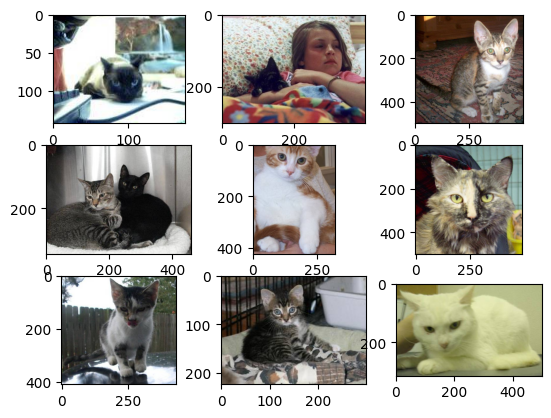

In [4]:
displayImages(folder+"train/cat/","cat",5)

In [5]:
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [6]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
import os

# Load an image using PIL
img = load_img(folder + 'train/dog/dog.1.jpg')  # this is a PIL image

# Convert the image to a Numpy array
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)

# Reshape the array to (1, 3, 150, 150)
x = x.reshape((1,) + x.shape)

# Specify the directory to save augmented images
save_to_dir = 'preview'

# Create the 'preview' directory if it doesn't exist
os.makedirs(save_to_dir, exist_ok=True)

# Generate augmented images and save them to the 'preview/' directory
i = 0
for batch in training_data_generator.flow(x, batch_size=1, save_to_dir=save_to_dir, save_prefix='dog', save_format='jpeg'):
    augmented_image = batch[0]
    pil_image = Image.fromarray(augmented_image.astype('uint8'))
    pil_image.save(os.path.join(save_to_dir, 'dog_{}.jpeg'.format(i)))
    i += 1
    if i > 10:
        break  # stop the loop after generating 10 augmented images


In [7]:
training_data_dir=folder+'train/'
validation_data_dir=folder+'validation/'
test_data_dir=folder+'test/'
IMAGE_WIDTH=100
IMAGE_HEIGHT=100
BATCH_SIZE=40
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 15488)             0

In [9]:
EPOCHS=30
history=model.fit(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

Epoch 1/30
25/25 [==============================] - 12s 202ms/step - loss: 0.8204 - accuracy: 0.5080 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 2/30
25/25 [==============================] - 7s 269ms/step - loss: 0.6963 - accuracy: 0.5050 - val_loss: 0.6908 - val_accuracy: 0.5750
Epoch 3/30
25/25 [==============================] - 5s 194ms/step - loss: 0.6939 - accuracy: 0.5420 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 4/30
25/25 [==============================] - 7s 272ms/step - loss: 0.6929 - accuracy: 0.5370 - val_loss: 0.6855 - val_accuracy: 0.5970
Epoch 5/30
25/25 [==============================] - 5s 193ms/step - loss: 0.6802 - accuracy: 0.5500 - val_loss: 0.6673 - val_accuracy: 0.5860
Epoch 6/30
25/25 [==============================] - 7s 271ms/step - loss: 0.6837 - accuracy: 0.5860 - val_loss: 0.6670 - val_accuracy: 0.5660
Epoch 7/30
25/25 [==============================] - 5s 192ms/step - loss: 0.6519 - accuracy: 0.6140 - val_loss: 0.6669 - val_accuracy: 0.5800
Epoch

In [10]:
_, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc * 100.0))

<ipython-input-10-9d0084e8b089>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 70.200%


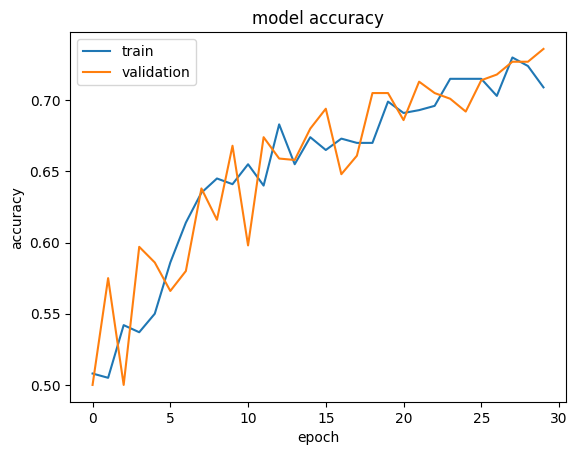

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<ipython-input-12-6b691f9c98db>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(test_generator, numtestimages)


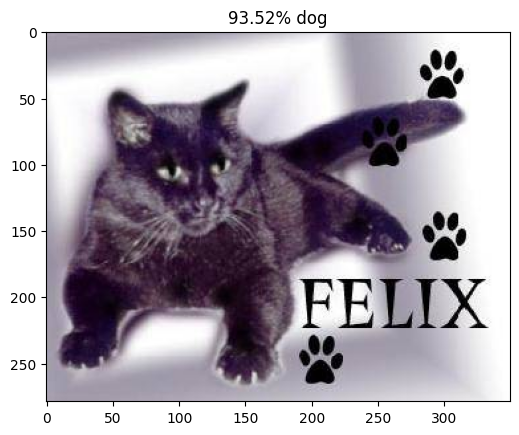

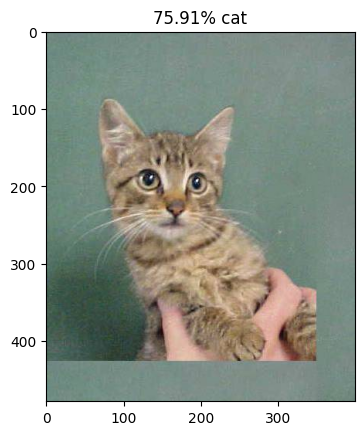

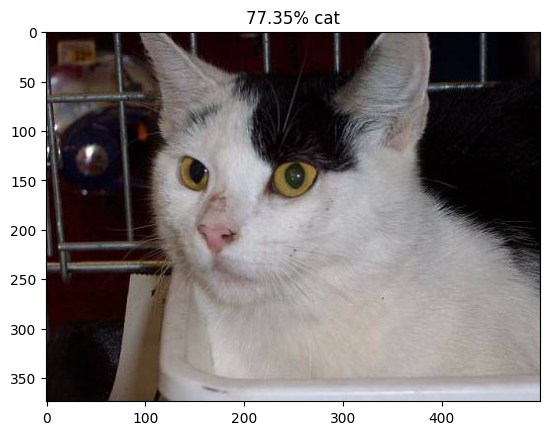

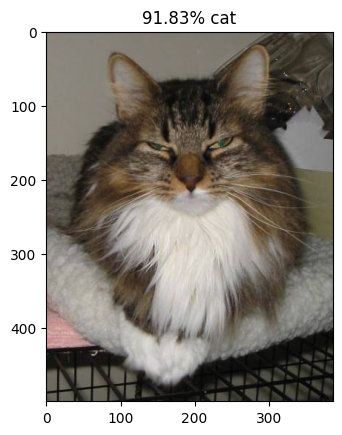

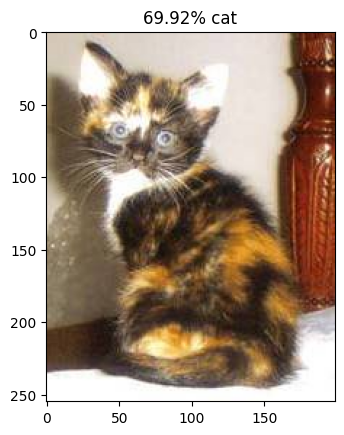

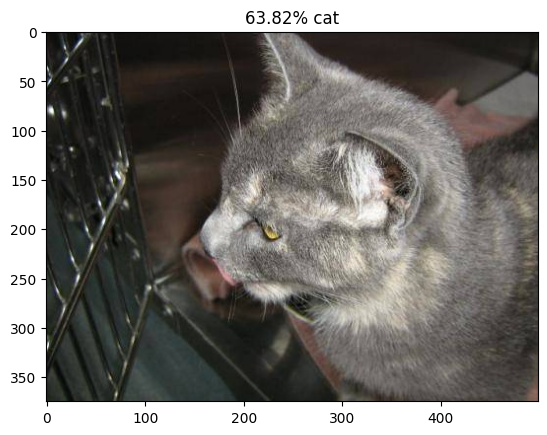

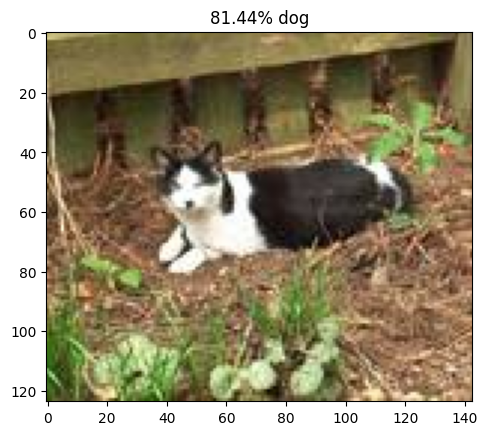

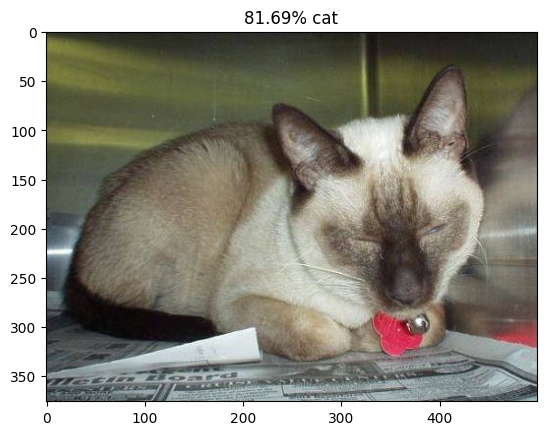

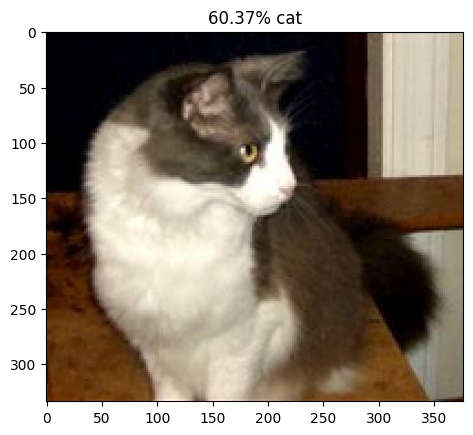

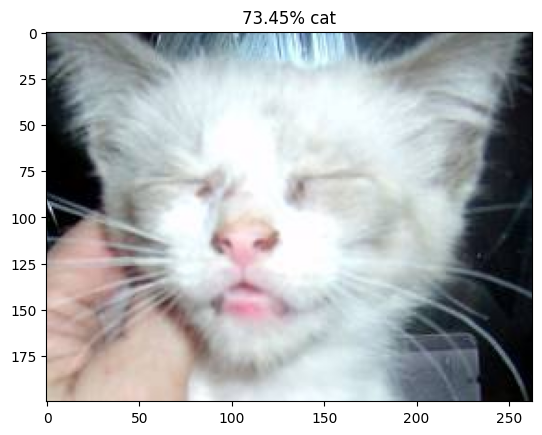

In [12]:
outputfile='output.txt'
numtestimages=10
open(outputfile,"w")
probabilities = model.predict_generator(test_generator, numtestimages)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = imread(image_path)
    with open(outputfile,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    pyplot.imshow(img)
    if probability > 0.5:
        pyplot.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        pyplot.title("%.2f" % ((1-probability[0])*100) + "% cat")
    pyplot.show()